In [1]:
import sklearn
import json
import operator
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import seaborn as sns
sns.set(style='ticks', palette='Set1')
%matplotlib inline
from scipy.interpolate import interp1d
hist1 = sklearn.externals.joblib.load('agent1_indhistex')
hist2 = sklearn.externals.joblib.load('agent2_indhistex')

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
def loader(dictionary):
    def load_keys(k):
        unjsoned = json.loads(k)
        loaded = tuple( ((tuple(unjsoned[0])), unjsoned[1] ))
        return loaded
    return {load_keys(k):v for k,v in dictionary.items()}
def get_score(hist):
    loaded = {k:len(json.loads(v)) for k,v in loader(hist).items()}
    not_running = sum([v for k,v in loaded.items() if k[0][1] == 'sleeping' and k[0][3]=='sleeping'])
    zero = sum([v for k,v in loaded.items() if k[0][0] == 0])
    total = sum([v for k,v in loaded.items()])
    return not_running, zero, total, not_running/total, zero/total
print(get_score(hist1))
print(get_score(hist2))

(1532, 88, 6839, 0.22400935809328848, 0.012867378271677147)
(886, 90, 6839, 0.12955110396256764, 0.013159818686942536)


In [3]:
explore = sklearn.externals.joblib.load('ind_writer')
record = sklearn.externals.joblib.load('ind_exwriter1')

one_explore = [(i[0], i[1]['battery']) for i in explore if i[1]['_id']==0]
one_exploit = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==0]
print(len(one_explore))

2689


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


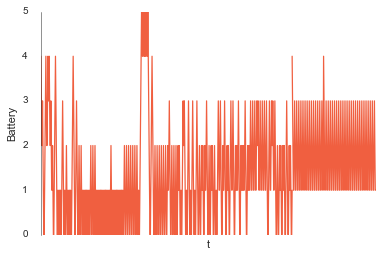

In [23]:
fig,ax = plt.subplots(1)
#one_plot = one[1083:1120]
#two_plot = two[1083:1120]
one_plot = one_explore[0:600]
two_plot = one_exploit[0:200]
two_plot[75] = (two_plot[78][0], two_plot[76][1]+1)
#two_plot[75] = (two_plot[89][0], two_plot[89][1]-1)
x1 = [e[0]+0.3*i for i,e in enumerate(one_plot)]
x2 = [x1[-1]+i-x1[0] for i in x1[0:200]]
#y1 =  [e[0]+0.3*i for i,e in enumerate(two_plot)]
ppl.plot(ax, x1,[i[1] for i in one_plot], label = 'Sensor 1', linewidth = 1.25, color = '#F05F40'  )
ppl.plot(ax, x2,[i[1] for i in two_plot], label = 'Sensor 2', linewidth = 1.25, color = '#F05F40' )
ax.set_ylim([0,5])
ax.set_xlim([x1[0],x2[-1]])
ax.set_ylabel('Battery')
ax.set_xlabel('t')
ax.set_xticks([])
ax.set_yticks(range(6))
#legend = plt.legend()
ax.spines['bottom'].set_visible(False)
fig.savefig('exploring', format = 'svg')

In [5]:
agent1 = sklearn.externals.joblib.load('agent1_battex')
loader(agent1)

{((0, 'pending', 0, 'pending'), 'go_to_sleep'): 12.589990801873126,
 ((0, 'pending', 0, 'sleeping'), 'go_to_sleep'): 680.2255295753698,
 ((0, 'pending', 1, 'pending'), 'go_to_sleep'): 753.6737796678021,
 ((0, 'pending', 1, 'running'), 'go_to_sleep'): 4.213684891307473,
 ((0, 'pending', 1, 'sleeping'), 'go_to_sleep'): 1045.864658569014,
 ((0, 'pending', 2, 'pending'), 'go_to_sleep'): -46.63705395097458,
 ((0, 'pending', 2, 'running'), 'go_to_sleep'): 405.3279454899461,
 ((0, 'pending', 2, 'sleeping'), 'go_to_sleep'): 313.96331628380295,
 ((0, 'pending', 3, 'pending'), 'go_to_sleep'): -100,
 ((0, 'pending', 3, 'running'), 'go_to_sleep'): 834.6572671065913,
 ((0, 'pending', 3, 'sleeping'), 'go_to_sleep'): 885.6186973611614,
 ((0, 'pending', 4, 'running'), 'go_to_sleep'): 397.83745844455007,
 ((0, 'pending', 5, 'sleeping'), 'go_to_sleep'): -100.0,
 ((0, 'sleeping', 0, 'pending'), 'noop'): 335.31677460489334,
 ((0, 'sleeping', 0, 'pending'), 'wakeup'): 19.711410572926567,
 ((0, 'sleeping', 

In [6]:
len(record)

22902

In [7]:

len([i for i in record if i[1]['status']=='sleeping' and i[1]['nstat']=='sleeping'])

2291

In [8]:
def time_sleeping(record):
    sleeper_indices = (ind for ind, el in enumerate(record) if
                       el[1]['status']=='sleeping' and el[1]['nstat']=='sleeping')
    times = (record[i+1][0]-record[i][0] for i in sleeper_indices)
    return sum(times)
def total_time(record):
    return record[-1][0]-record[0][0]
time_sleeping(record[0:480])/total_time(record[0:480])

0.14198704536942627

In [9]:
two_plot

[(0.7230737819991191, 4),
 (0.7262297440029215, 3),
 (0.7276136350046727, 2),
 (0.7288509360005264, 1),
 (0.7407224640046479, 1),
 (0.742179346998455, 2),
 (0.7434540370013565, 3),
 (0.7585965960024623, 2),
 (0.7599900860004709, 1),
 (0.7612001790039358, 1),
 (0.792406986001879, 2),
 (0.7959819989991956, 3),
 (0.7974659460014664, 2),
 (0.826933321004617, 1),
 (0.8283813349989941, 1),
 (0.8296953440003563, 2),
 (0.8549846360037918, 3),
 (0.8607986010028981, 2),
 (0.8644988830055809, 1),
 (0.8857529710003291, 1),
 (0.8876533860020572, 2),
 (0.8890420169991557, 3),
 (0.9117635600050562, 2),
 (0.9130367300022044, 1),
 (0.9209922560039558, 1),
 (0.922849798000243, 2),
 (0.9413277960047708, 3),
 (0.9506346410053084, 2),
 (0.9521497750029084, 1),
 (0.95332707700436, 1),
 (0.9769054510034039, 2),
 (0.9789126940013375, 3),
 (0.9801892020041123, 2),
 (1.005667411001923, 1),
 (1.009595141003956, 1),
 (1.010934335005004, 2),
 (1.0392463310054154, 3),
 (1.0411970310015022, 2),
 (1.0480638160006492,

In [10]:
record

[(0.7230737819991191,
  {'_id': 0,
   'battery': 4,
   'neighbour': 5,
   'nstat': 'running',
   'status': 'running'}),
 (0.7243523810029728,
  {'_id': 1,
   'battery': 4,
   'neighbour': 4,
   'nstat': 'running',
   'status': 'running'}),
 (0.7262297440029215,
  {'_id': 0,
   'battery': 3,
   'neighbour': 4,
   'nstat': 'running',
   'status': 'running'}),
 (0.7267493440012913,
  {'_id': 1,
   'battery': 3,
   'neighbour': 3,
   'nstat': 'running',
   'status': 'running'}),
 (0.7276136350046727,
  {'_id': 0,
   'battery': 2,
   'neighbour': 3,
   'nstat': 'running',
   'status': 'running'}),
 (0.7280810060037766,
  {'_id': 1,
   'battery': 2,
   'neighbour': 2,
   'nstat': 'running',
   'status': 'running'}),
 (0.7288509360005264,
  {'_id': 0,
   'battery': 1,
   'neighbour': 2,
   'nstat': 'running',
   'status': 'pending'}),
 (0.7293090220045997,
  {'_id': 1,
   'battery': 1,
   'neighbour': 1,
   'nstat': 'pending',
   'status': 'pending'}),
 (0.7407224640046479,
  {'_id': 0,
   'b

In [11]:
1804/25256

0.07142857142857142

In [12]:
x1

[14.88901250500021,
 15.19037517199995,
 15.491533627999706,
 15.813998828000331,
 16.117912970000543,
 16.419676280000203,
 16.73803829300032,
 17.039456283000256,
 17.345724568000513,
 17.650005720999797,
 17.955861446999734,
 18.259016392000195,
 18.56915599499971,
 18.870518347000505,
 19.174283870999897,
 19.475581661000433,
 19.7995145769999,
 20.105679087999853,
 20.40700960100039,
 20.716699810999852,
 21.018723672000306,
 21.331517553999948,
 21.633015482999873,
 21.937053643000034,
 22.239086533000044,
 22.559630425999785,
 22.861205951000375,
 23.165462919000312,
 23.469133982000493,
 23.77733113999984,
 24.093313459000456,
 24.39467466600017,
 24.70053426200011,
 25.002119080000192,
 25.303859036000357,
 25.62482568300038,
 25.925998129000433,
 26.23178224100011,
 26.533115249000183,
 26.853753512000548,
 27.155093412000497,
 27.459651146000212,
 27.76128191900043,
 28.06265724200002,
 28.38562306700005,
 28.687017410999943,
 28.991148853999945,
 29.292499526000576,
 29.614

In [13]:
x2

[106.7322565309998,
 107.03361919799954,
 107.3347776539993,
 107.65724285399993,
 107.96115699600014,
 108.2629203059998,
 108.58128231899991,
 108.88270030899986,
 109.1889685940001,
 109.4932497469994,
 109.79910547299933,
 110.10226041799979,
 110.41240002099931,
 110.7137623730001,
 111.0175278969995,
 111.31882568700003,
 111.64275860299949,
 111.94892311399946,
 112.25025362699998,
 112.55994383699945,
 112.8619676979999,
 113.17476157999954,
 113.47625950899948,
 113.78029766899962,
 114.08233055899964,
 114.40287445199937,
 114.70444997699997,
 115.00870694499991,
 115.31237800800008,
 115.62057516599944,
 115.93655748500004,
 116.23791869199977,
 116.54377828799971,
 116.84536310599978,
 117.14710306199996,
 117.46806970899996,
 117.76924215500003,
 118.07502626699971,
 118.37635927499977,
 118.69699753800015,
 118.99833743800008,
 119.30289517199981,
 119.60452594500003,
 119.90590126799961,
 120.22886709299965,
 120.53026143699952,
 120.83439287999954,
 121.13574355200018,


In [14]:
x1[-1]+x1[0]

121.62126903600002